In [1]:
import os
import cv2
import numpy as np
import utils as u
from box_detection import box_detection
import matplotlib.pyplot as plt 

/Users/Mathian/Documents/IA/Vision_par_ordinateur/VisualChess/code


['0.png', '1.png', '2.png', '3.png', '4.png', '5.png']


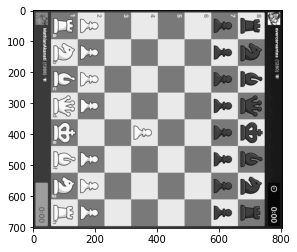

In [2]:
game_images_path = '.././photos_test/chess.com/'
path_image_list = sorted(os.listdir(game_images_path))
print(path_image_list)
move_nb = len(path_image_list)

# List d'images représentant les différents boards
move_image_list = [cv2.imread('.././photos_test/chess.com/' + path,0) for path in path_image_list] 

plt.imshow(move_image_list[1], cmap = 'gray')
plt.show()


In [3]:
# parameters
binary_threshold = 200
use_median = False
hough_lines_threshold = 150

list_coord_boxes = [ box_detection('.././photos_test/chess.com/' + path, binary_threshold, use_median, hough_lines_threshold)[1] for path in path_image_list] # liste de liste de coordonnées de box
print(len(list_coord_boxes[0]))


64


In [4]:
print(list_coord_boxes[0])

{'a1': [(65, 5), (141, 5), (65, 89), (141, 89)], 'a2': [(141, 5), (226, 5), (141, 89), (226, 89)], 'a3': [(226, 5), (313, 5), (226, 89), (313, 89)], 'a4': [(313, 5), (398, 5), (313, 89), (398, 89)], 'a5': [(398, 5), (483, 5), (398, 89), (483, 89)], 'a6': [(483, 5), (569, 5), (483, 89), (569, 89)], 'a7': [(569, 5), (655, 5), (569, 89), (655, 89)], 'a8': [(655, 5), (741, 5), (655, 89), (741, 89)], 'b1': [(65, 89), (141, 89), (65, 175), (141, 175)], 'b2': [(141, 89), (226, 89), (141, 175), (226, 175)], 'b3': [(226, 89), (313, 89), (226, 175), (313, 175)], 'b4': [(313, 89), (398, 89), (313, 175), (398, 175)], 'b5': [(398, 89), (483, 89), (398, 175), (483, 175)], 'b6': [(483, 89), (569, 89), (483, 175), (569, 175)], 'b7': [(569, 89), (655, 89), (569, 175), (655, 175)], 'b8': [(655, 89), (741, 89), (655, 175), (741, 175)], 'c1': [(65, 175), (141, 175), (65, 263), (141, 263)], 'c2': [(141, 175), (226, 175), (141, 263), (226, 263)], 'c3': [(226, 175), (313, 175), (226, 263), (313, 263)], 'c4':

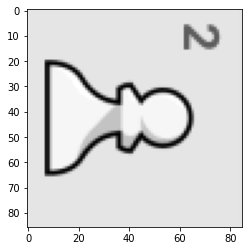

In [5]:
#liste de dimensions move_nb x 64, images des 64 cases pour chaque mouvement
list_square_img = [u.get_all_squares(list_coord_boxes[i], move_image_list[i]) for i in range(move_nb)]
plt.imshow(list_square_img[1][1], cmap='gray')
plt.show()

In [6]:
# List de array représentant chaque position
list_array_move = [u.squares_to_array(list_square) for list_square in list_square_img]
print(list_array_move[1])

[[2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 1]]


In [7]:
# Affiche une nouvelle posiiton
initial_position = u.get_initial_position()
u.get_moves(initial_position, list_array_move[1:])

[['R' 'N' 'B' 'Q' 'K' 'B' 'N' 'R']
 ['P' 'P' 'P' 'P' 'P' 'P' 'P' 'P']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['p' 'p' 'p' 'p' 'p' 'p' 'p' 'p']
 ['r' 'n' 'b' 'q' 'k' 'b' 'n' 'r']] 

[['R' 'N' 'B' 'Q' 'K' 'B' 'N' 'R']
 ['P' 'P' 'P' 'P' 'P' 'P' 'P' 'P']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' 'p' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['p' 'p' 'p' 'p' ' ' 'p' 'p' 'p']
 ['r' 'n' 'b' 'q' 'k' 'b' 'n' 'r']] 

[['R' 'N' 'B' 'Q' 'K' 'B' 'N' 'R']
 ['P' 'P' 'P' 'P' ' ' 'P' 'P' 'P']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' 'P' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' 'p' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['p' 'p' 'p' 'p' ' ' 'p' 'p' 'p']
 ['r' 'n' 'b' 'q' 'k' 'b' 'n' 'r']] 

[['R' 'N' 'B' 'Q' 'K' 'B' 'N' 'R']
 ['P' 'P' 'P' 'P' ' ' 'P' 'P' 'P']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' 'P' ' ' ' ' ' ']
 [' ' ' ' '

'1.e4 e5 2.f4 xf4 3.Nf3'